In [1]:
%load_ext autoreload
%autoreload 2

# Simple Transport Model

In [2]:
from pymf6.modeling_tools.make_model import make_input, run_simulation
from pymf6.modeling_tools.plotting import show_heads, show_well_head, show_concentration
from pymf6.modeling_tools.base_model import make_model_data

In [3]:
model_path = 'models/mf6'
name = 'transport'

chd = []
for row in range(10):
    chd.append([(0, row, 0), 1., 10.0])
for row in range(10):
    chd.append([(0, row, 9), 0.5, 0.0])

wells = {}
for row in range(1, 9):
    wells[f'wel{row}'] =  {'q': (0, 0, 0), 'coords': (0, row, 4)}

specific_model_data = {
    'model_path': model_path,
    'name': name,
    'transport': True,
    'times': (
        50.0,  # perlen (double) is the length of a stress period.
        120,   # nstp (integer) is the number of time steps in a stress period.
        1.0,   # tsmult (double) is the multiplier for the length of successive
               # time steps.
    ),
    'obs': [
        ('upper_left', (0, 1, 7)),
        ('lower_right', (0, 8, 1))
    ],
    'chd': chd,
    'wells': wells,
    # 'cnc': [],
}

model_data = make_model_data(specific_model_data)
del model_data['cnc']

In [4]:
make_input(model_data)

In [5]:
run_simulation(model_path=model_path)

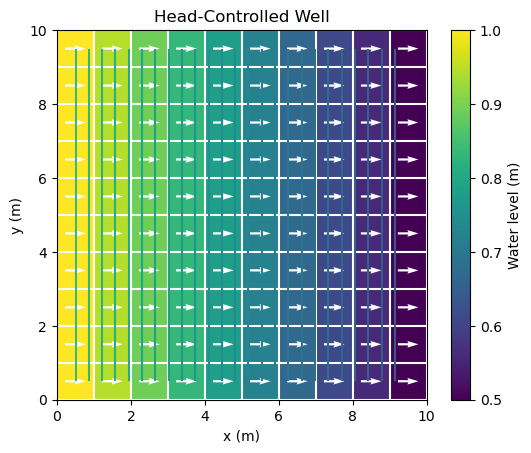

In [6]:
show_heads(model_path=model_path, name=name);

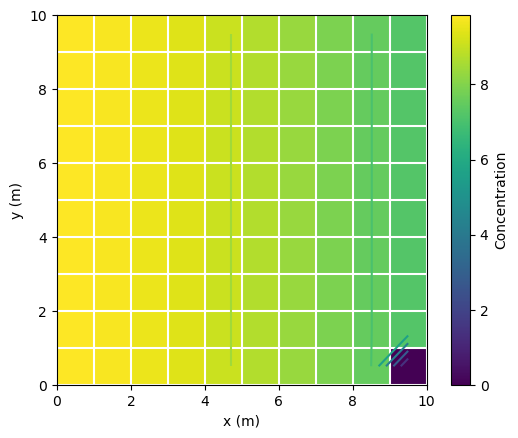

In [7]:
show_concentration(model_path=model_path, name=name);

# Controlled

In [9]:
model_path_controlled = 'models/pymf6'

In [11]:
specific_model_data['model_path'] = model_path_controlled
model_data = make_model_data(specific_model_data)
del model_data['cnc']
make_input(model_data)